### Example Calculations with Map Projections:
###  Application to Computing the Fractal Dimension
####   Daniel Trugman, 2024

See: https://academic.oup.com/gji/article/139/3/754/587119
for discussion on measuring fractal dimension from seismicity catalogs

In [1]:
### Packages

# load these
using DataFrames
using PyPlot
using StatsBase
using Printf
using GLM
using StatSei

xypos2latlon (generic function with 2 methods)

In [2]:
### Load the catalog

# load catalog - CA/NV seismicity back to 1980
minmag = 2.5
qdf = load_catalog_merged("../data/calnev2R_M2_combined.csv.gz",minmag)

# show results
qdf

Row,evid,otime,tepoch,lat,lon,dep,mag,enum
,Int64,DateTime,Float64,Float64,Float64,Float64,Float64,Int64
1,1049655,1980-01-01T02:09:21.250,3.15541e8,36.2478,-120.819,6.078,3.65,1
2,1049656,1980-01-01T02:09:26.850,3.15541e8,36.2533,-120.818,10.464,3.2,2
3,3325143,1980-01-01T04:29:43.260,3.15549e8,32.7955,-115.457,10.0,3.12,3
4,1049676,1980-01-02T01:19:07.250,3.15624e8,37.5902,-118.96,8.521,2.94,4
5,1049680,1980-01-02T10:39:31.510,3.15658e8,36.2538,-120.814,5.883,2.87,5
6,12319391,1980-01-02T17:40:17.240,3.15683e8,34.4485,-119.68,15.6,3.15,6
7,10068566,1980-01-02T20:25:29.250,3.15693e8,33.04,-115.499,5.1,2.83,7
8,1049692,1980-01-03T05:35:12.030,3.15726e8,37.5578,-118.893,4.109,3.03,8
9,3325173,1980-01-03T22:37:28.840,3.15787e8,33.9425,-116.304,0.7,2.52,9


In [3]:
### Project Data

# setup projection
mapproj = "lcc" # lambert conical cylindrical projection
fproj = setup_projection(qdf.lon,qdf.lat,mapproj)

# calculate x-y coordinates
qdf[!,"x"],qdf[!,"y"] = lonlat2xypos(qdf.lon,qdf.lat,fproj)

# show results
println("With projection: ")
qdf[!,[:otime,:mag,:lon,:lat,:x,:y]]

With projection: 


Row,otime,mag,lon,lat,x,y
,DateTime,Float64,Float64,Float64,Float64,Float64
1,1980-01-01T02:09:21.250,3.65,-120.819,36.2478,-243.055,30.5098
2,1980-01-01T02:09:26.850,3.2,-120.818,36.2533,-242.949,31.1167
3,1980-01-01T04:29:43.260,3.12,-115.457,32.7955,248.628,-352.194
4,1980-01-02T01:19:07.250,2.94,-118.96,37.5902,-74.9368,176.282
5,1980-01-02T10:39:31.510,2.87,-120.814,36.2538,-242.618,31.1629
6,1980-01-02T17:40:17.240,3.15,-119.68,34.4485,-144.062,-171.126
7,1980-01-02T20:25:29.250,2.83,-115.499,33.04,244.045,-325.186
8,1980-01-03T05:35:12.030,3.03,-118.893,37.5578,-68.9946,172.645
9,1980-01-03T22:37:28.840,2.52,-116.304,33.9425,166.973,-226.829


X-bnds: -660.1 355.7
Y-bnds: -531.9 666.4
Z-bnds: -2.0 50.1


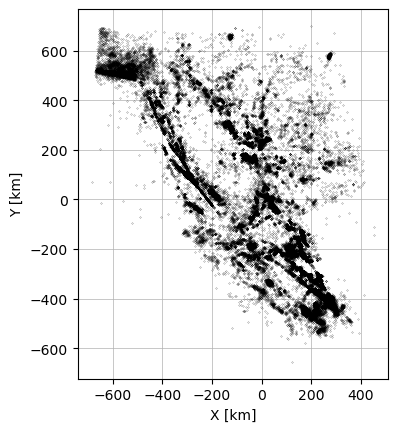

In [4]:
### Plot data and examine bounds

# plotting
fig, axi = plt.subplots(1,1)
axi.set_aspect("equal")
axi.plot(qdf.x,qdf.y,"k.",ms=.3)
axi.set_xlabel("X [km]")
axi.set_ylabel("Y [km]")
axi.grid(lw=0.5)

# calculate bounds
minX, maxX = quantile(qdf.x,[0.001,0.999])
minY, maxY = quantile(qdf.y,[0.001,0.999])
minZ, maxZ = quantile(qdf.dep,[0.001,0.999])

# show
@printf("X-bnds: %.1f %.1f\n",minX,maxX)
@printf("Y-bnds: %.1f %.1f\n",minY,maxY)
@printf("Z-bnds: %.1f %.1f\n",minZ,maxZ)

In [6]:
### Setup Boxes for 2D fractal dimension calculation

# bounds
xb1, xb2 = minX, maxX
yb1, yb2 = minY, maxY

# grids to try
rmin, rmax = 5.5, 110.0 # don't make too small b/c of location uncertainty
gxx = 10.0.^(range(log10(rmin),stop=log10(rmax),length=32))
nbox = zeros(Int64,length(gxx))

# find all non empty grid points
for (ii,g) in enumerate(gxx)
    h = fit(Histogram,(qdf.x,qdf.y),(xb1:g:xb2,yb1:g:yb2))
    nbox[ii] = sum(h.weights .> 0)
end

# create a datafram
df = DataFrame("x"=>log10.(gxx),
    "y"=>log10.(convert.(Float64,nbox)))
df

Row,x,y
,Float64,Float64
1,0.740363,3.97731
2,0.782331,3.93288
3,0.8243,3.88925
4,0.866269,3.84479
5,0.908238,3.79727
6,0.950206,3.74609
7,0.992175,3.69496
8,1.03414,3.64038
9,1.07611,3.58995


In [7]:
### Fit linear model

# fit with GLM
model = lm(@formula(y ~ 1 + x), df)

# predict
df[!,:yp] = predict(model)

# show
model

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int32}}}}, Matrix{Float64}}

y ~ 1 + x

Coefficients:
─────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)   5.30774   0.0374295  141.81    <1e-43    5.2313     5.38418
x            -1.62876   0.0259234  -62.83    <1e-32   -1.68171   -1.57582
─────────────────────────────────────────────────────────────────────────

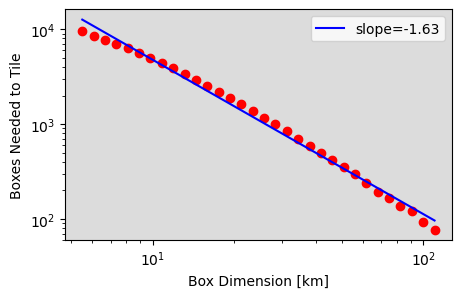

In [8]:
### Plot results - slope give fractal dimension

# figure setup
fig, axi = plt.subplots(1,1,figsize=(5,3))
axi.set_facecolor("gainsboro")

# plot results
axi.loglog(gxx,nbox,"ro")
axi.loglog(gxx,10.0.^df.yp,"-b",label=@sprintf(
    "slope=%.2f",coef(model)[2]))

# formatting
axi.set_xlabel("Box Dimension [km]")
axi.set_ylabel("Boxes Needed to Tile")
axi.legend(loc="upper right");